# Graphizi - Libraire d’analyse de graphe facile
# Graphizi - A Simple Graph Analysis Library

### Imports

In [2]:
import networkx as nx
import matplotlib.pyplot as plt
import math
import random

### Fonction d'affichage
### Ploting function

In [3]:
def plot_graph(dict):
    G = nx.Graph(dict)
    plt.figure(figsize=(3,3))
    nx.draw(G, with_labels=True, font_weight='bold')

### Voici la librairie
### Here's the library

In [4]:
class Graph:
    '''
    The class "Graph" defines a valued oriented or non oriented graph 
    we provide methods to determine if the graph is whether hamiltonian or eulerian.
    You can also use prims and dijkstra algoritms.
    '''

    #savoir si un graphe est hamiltonien, eulerien, prims, dijkstra
    
    def __init__(self,dictionnary=None):
        if dictionnary == None :
            self.neighbours={}
        else:
            self.neighbours=dictionnary
        
        self.cost={}
    
    def init_all_costs_1(self):
        '''
        Initialise l'ensemble des couts a 1, cette methode doit 
        imperativement etre lancée lorsque l'ensemble des connexions
        entre sommets ont étées definies.

        Initializes every costs to 1, this method must imperatively be launched
        after all connexions between vertices are defined.  
        '''
        for node in self.get_nodes():
            for neighbour in self.get_neighbours(node):
                self.cost[node,neighbour]=1
    
    def set_cost(self,v1,v2,cost):
        '''
        Permet de parametrer manuelement le cout entre deux noeuds,
        s'utilise de preference après init_all_costs_1(self)

        Using this method you can manualy set the cost between 2 nodes/vertices
        '''
        self.cost[v1,v2]=cost
        
    def add_edge(self,node,list_neighbours):
        '''
        Cette fonction permet d'ajouter une ou plusieurs arretes a un sommet donné

        This function add one or several edges for a given node
        '''
        self.neighbours[node]=list_neighbours
    
    def get_neighbours(self,node):
        '''
        Renvoie les voisin pour un sommet donné

        Returns neighbours for a given node
        '''
        return self.neighbours[node]
    
    def get_graph(self):
        '''
        Renvoie la structure dictionnaire du graphe

        Returns the graph composition in a dictionnary form
        '''
        return self.neighbours
    
    def get_size(self):
        '''
        Renvoie le nombre de noeuds du graphe => la taille du graphe

        Returns the number of node of a graph => graph's size
        '''
        return len(self.neighbours.keys())
    
    def get_nodes(self):
        '''
        Renvoie l'ensemble des noeuds du graphe 

        Returns the set containing all nodes in graph
        '''
        return [i for i in self.neighbours.keys()]
    
    def bfs(self, start):
        '''
        Effectue un parcours en largeur du graphe 
        a partir du noeud "start" (bread first search)

        Performs a Bread first search from the node "start
        '''
        # garde une trace des noeuds visités
        explored = []
        # garde une trace des noeuds a parcourir 
        queue = [start]

        # On itère tant qu'il reste des noeuds a parcourir
        while queue:
            # On pop le premier noeud de la queue (file) (c'est le moins profond)
            node = queue.pop(0)
            if node not in explored:
                # Si le noeud n'a pas été exploré auparavant on l'ajoute a la liste des noeuds parcourus
                explored.append(node)
                neighbours = self.get_neighbours(node).copy()

                # On ajoute les voisins du noeud a la queue 
                # pour qu'ils soient explorés a l'iteration suivante
                for neighbour in neighbours:
                    queue.append(neighbour)
        return explored
    
    
    def dfs(self, node):
        '''
        Effectue un parcours en profondeur du graphe 
        a partir du noeud "node" (dept first search)
        
        Performs a dept first search from the node "start
        '''
        # garde une trace des noeuds visités
        visited = [node]
        # garde une trace des noeuds a parcourir 
        stack = [node]
        # tant qu'il reste des noeuds a parcourir on itère
        while stack:
            # Stack est une pile donc fonctionne en LIFO 
            # a chaque iteration on recupère le dernier noeud de la liste
            node = stack[-1] 
            # Si le noeud n'a pas été visité on l'ajoute a la liste des noeuds visités
            if node not in visited:
                visited.extend(node)
                
            remove_from_stack = True
            # tant que les noeuds voisins n'ont pas étés visités 
            # on les ajoute a la pile, ils seront visité a l'iteration suivante
            for next in self.get_neighbours(node):
                if next not in visited:
                    stack.extend(next)
                    remove_from_stack = False
                    break
            if remove_from_stack:
                stack.pop()
        return visited
    
    def hamiltonien(self, start):
        '''
        Cette fonction determine pour un point de depart donné si il existe
        un cycle hamiltonien et si oui lequel.
        L'approche etant recursive, on stocke et proapge le chemin au fil des appels.
        La fonction est encapsulée dans une autre pour permettre son utilisation
        dans cette librairie.

        This function determines for a starting given point whether an hamiltonian cycle exists
        and if yes which one. 
        It is a recursive approach, we store and propagate through the path along with function calls.
        The function is encapsuled in another in order to use it as a method in the class. 
        '''
        def hamilton(G, size, pt, path=[]):
            #print('hamilton called with pt={}, path={}'.format(pt, path))
            # Si le point actuel pt n'appartient pas au chemin hamiltonien
            if pt not in set(path):
                # On ajoute ce point au chemin
                path.append(pt)
                # Si le chemin fait la taille du graphe alors on a trouvé
                # un chemin hamiltonien qui parcours l'ensemble des sommets
                # du graphe donc il est hamiltonien.
                if len(path)==size:
                    return path
                
                for pt_next in G.get(pt, []): 
                    # fonction get : python verifie que pt existe dans le dictionnaire et 
                    # retourne ses voisins a parcourir sinon elle renvoie une liste vide
                    res_path = path.copy()
                    candidate = hamilton(G, size, pt_next, res_path)
                    if candidate is not None:  # Soit on passe a la recursion suivante soit le candidat a déja été visité 
                        return candidate
                
                #print('le chemin {} est incomplet'.format(path))
            else:
                #print('le pt {} est deja dans le chemin {}'.format(pt, path))
                return None
                # Boucle ou se termine, None est implicitement retourné
        
        
        G=self.get_graph()
        size=self.get_size()
        return hamilton(G, size, start, path=[])
    
    def eulerien(self):
        '''
        Verifie que le graphe est eulerien en appliquant 
        le theoreme : un graph G est eulerien ssi deg(u) pair
        pour tout u dans G

        Check if the graph is Eulerian by applying the following 
        theorem : A graph G is Euleurian iif deg(u) is even for all u in G
        '''
        for node in self.get_nodes() :
            if len(self.get_neighbours(node))%2 != 0:
                return False
        return True
    
    
    
    def dijkstra(self,start,end):
        '''
        Determine un parcours de cout minimal entre le noeud
        start et le noeud end, selon l'algorithme de dijkstra

        Returns the minimun cost walk between the starting and ending node
        according to dijkstra algorithm.  
        '''
        # Initialisations
        dist={}
        previous={}
        for node in self.get_nodes():
            dist[node]= math.inf
            previous[node] = None
            dist[start] = 0
            queue = self.get_nodes()
            
        while queue :  
            # On recupere 'u' le noeud de la queue 
            # dont la distance est minimale
            min=math.inf
            for vertex in queue :
                if dist[vertex]<min:
                    min=dist[vertex]
                    u=vertex
        
            if dist[u] == math.inf : break # Il n'existe pas de chemin 
            if u==end :  break # La destination est atteinte
            queue.remove(u)
            
            # Recherche d'un parcours alternatif
            for neighbour in self.get_neighbours(u):
                alt = dist[u] + self.cost[u,neighbour]
                if alt<dist[neighbour]:
                    dist[neighbour]=alt
                    previous[neighbour]=u
        # Reconstitution du chemin le plus court    
        S=[]
        u=end
        while previous[u] != None :
            S.insert(0,u)
            u=previous[u]
        
        S.insert(0,start)
        return S
    
    
    def prims(self):
        '''
        Applique l'algorithme de Prims et retourne l'arbre recouvrant
        de poids minimal.

        Apply Prims algorithm and returns the minimum spanning tree
        '''
        # Initialisations
        dist={}
        previous={}
        for node in self.get_nodes():
            dist[node]= math.inf
            previous[node] = None
        i=random.randint(0,len(self.get_nodes())-1)
        init_node=self.get_nodes()[i]
        previous[init_node] = init_node
        dist[init_node] = 0
        queue = self.get_nodes()
        while queue :
            min=math.inf
            for vertex in queue :
                if dist[vertex]<min:
                    min=dist[vertex]
                    u=vertex
            queue.remove(u)
    
            for neighbour in self.get_neighbours(u):
                if (neighbour in queue) \
                and dist[neighbour] > self.cost[u,neighbour]:
                    dist[neighbour]=self.cost[u,neighbour]
                    previous[neighbour]=u
                elif previous[neighbour]==None :
                    dist[neighbour]=self.cost[u,neighbour]
                    queue.insert(0,neighbour)
        return previous
    

    def is_n_complet(self):
        '''
        Permet de savoir si le graph est n-complet.
        
        Tells if the graph is n-complete or not.
        '''
        E=len([item for sublist in g.get_graph().values() for item in sublist])
        n=self.get_size()
        for node in self.get_nodes() :
            if not(len(self.get_neighbours(node)) == n\
            and E == n*(n-1)) :
                return False 
        return True   

# Exemple 1 : Parcourir un graph 
# Example 1 : Graph walkthrough

parcours en largeur (BFS) : ['A', 'D', 'B', 'G', 'F', 'E', 'C']
parcours en profondeur (DFS) : ['A', 'D', 'F', 'C', 'B', 'E', 'G']
Chemin de cout minimal (Dijkstra) entre D et C : ['D', 'A', 'B', 'F', 'C']


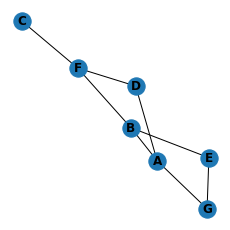

In [6]:
# First, let's instantiate the Graph 
g=Graph()
# Methode add_edge pour ajouter des arretes
g.add_edge('A',['D','B','G'])
g.add_edge('B',['A','E','F'])
g.add_edge('C',['F'])
g.add_edge('D',['A','F'])
g.add_edge('E',['B','G'])
g.add_edge('F',['C','D','B'])
g.add_edge('G',['A','E'])
# On initialise les couts a 1
g.init_all_costs_1()
# On modifie les couts souhaités
g.set_cost('D','F',7)

bfs=g.bfs('A')
dfs=g.dfs('A')

starting_node='D'
arrival_node='C'
dij=g.dijkstra(starting_node,arrival_node)


plot_graph(g.get_graph())
print('parcours en largeur (BFS) :', bfs)
print('parcours en profondeur (DFS) :',dfs)
print('Chemin de cout minimal (Dijkstra) entre {} et {} : {}'.format(starting_node,arrival_node,dij))



# Exemple 2 : Savoir si un graphe est Hamiltonien ou Eulerien 
# Example 2 : Check if a graph is Hamiltonian or Eulerian 

### Creation du graph avec notre librairie et demonstration

In [7]:
is_hamiltonien=False
nb_path=0
for node in g.get_graph():
    if g.hamiltonien(node)!=None :
        print('Chemin Hamiltonien : ',g.hamiltonien(node))
        nb_path+=1
        is_hamiltonien=True
if is_hamiltonien :
    print('Il existe {} chemin(s) Hamiltonien(s).\nLe graphe est Hamiltonien'.format(nb_path))
else : 
    print("Il n'existe pas de chemin passant par l'ensemble des noeuds du graphe une seuls fois.\n"+\
          +"Le graphe n'est pas Hamiltonien")

Chemin Hamiltonien :  ['B', 'E', 'G', 'A', 'D', 'F', 'C']
Chemin Hamiltonien :  ['C', 'F', 'D', 'A', 'B', 'E', 'G']
Chemin Hamiltonien :  ['D', 'A', 'G', 'E', 'B', 'F', 'C']
Chemin Hamiltonien :  ['G', 'E', 'B', 'A', 'D', 'F', 'C']
Il existe 4 chemin(s) Hamiltonien(s).
Le graphe est Hamiltonien


In [8]:
if g.eulerien():
    print('Le graphe est Eulerien')
else :
    print("Le graphe n'est pas Eulerien")

if g.is_n_complet():
    print('Le graphe est {}-complet'.format(g.get_size()))
else :
    print("Le graphe n'est pas {}-complet".format(g.get_size()))

Le graphe n'est pas Eulerien
Le graphe n'est pas 7-complet


# Exemple 3 : Trouver un arbre recouvrant minimal 
# Example 3 : Find a Minimum Spanning Tree

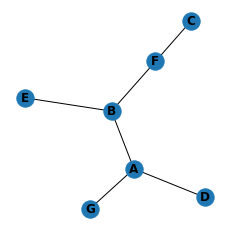

In [9]:
mst=g.prims()
plot_graph(mst)

# Sources 

* [Fleury's Algorithm for Eulerian Path](https://www.geeksforgeeks.org/fleurys-algorithm-for-printing-eulerian-path/)
* [Dijkstra Algorithm](https://fr.wikipedia.org/wiki/Algorithme_de_Dijkstra)
* [Graph Traversals - BFS & DFS -Breadth First Search and Depth First Search](https://www.youtube.com/watch?v=pcKY4hjDrxk)
* [Prim's Algorithm - Description of the algorithm](https://www-m9.ma.tum.de/graph-algorithms/mst-prim/index_en.html)